In [102]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import json

To calculate the weighted mean, the columns thought to be the most important where selected. Then the weighted mean was calculated for each row. The weighted mean was calculated as follows:


In [103]:
#Looking at the correlation

In [104]:
import pandas as pd

year_to_keep = "2018"
df = pd.read_csv("Dwellings_totalNZ-wide_format_updated_16-7-20.csv")

df = df.filter(regex=f'{year_to_keep}')
df = df.replace('C', -1)
column_name_mapping = json.load(open("mappings/name_mapping_weighted_mean.json"))
heating = column_name_mapping['heating']
df = df[heating.keys()]
df = df.rename(columns=heating)
df.tail()

/tmp/ipykernel_17194/2074884176.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dwellings_totalNZ-wide_format_updated_16-7-20.csv")


,total_dwlg,Heat Pump,Electric,Gas(fixed),Gas(portable,Wood,Pellets,Coal,Other,*Total Damp,*Total Mould
32516,19770,8439,6183,849,549,11622,147,132,495,2529,1860
32517,19980,11961,8028,1197,597,5922,294,36,315,3099,2208
32518,18912,9993,5655,717,732,10152,207,177,411,2136,1455
32519,285,30,36,3,18,183,3,15,30,120,90
32520,1664313,723792,675018,179571,96570,494841,15093,18813,45132,318891,252855


In [105]:
#Divide all columns by the total number of dwellings
df = df[:29889]
df = df.apply(pd.to_numeric, errors='coerce')
df = df.div(df['total_dwlg'], axis=0)

In [106]:
#Exclude these columns
# Calculate the correlation table
df.drop(columns=['total_dwlg'], inplace=True)
correlation_table = df.corr()


# Display the correlation table
print(correlation_table)

              Heat Pump  Electric  Gas(fixed)  Gas(portable      Wood  \
Heat Pump      1.000000  0.113449    0.171552     -0.149462 -0.076270   
Electric       0.113449  1.000000    0.181471      0.160703 -0.345923   
Gas(fixed)     0.171552  0.181471    1.000000      0.094049 -0.225014   
Gas(portable  -0.149462  0.160703    0.094049      1.000000  0.004606   
Wood          -0.076270 -0.345923   -0.225014      0.004606  1.000000   
Pellets        0.352649  0.234490    0.133713      0.240419  0.152549   
Coal           0.065304  0.021327   -0.002024      0.149161  0.271674   
Other          0.167327  0.145587    0.374665      0.062691  0.142826   
*Total Damp   -0.294337  0.239898   -0.129778      0.324226 -0.001257   
*Total Mould  -0.307470  0.255892   -0.090953      0.359965 -0.063022   

               Pellets      Coal     Other  *Total Damp  *Total Mould  
Heat Pump     0.352649  0.065304  0.167327    -0.294337     -0.307470  
Electric      0.234490  0.021327  0.145587     0.239

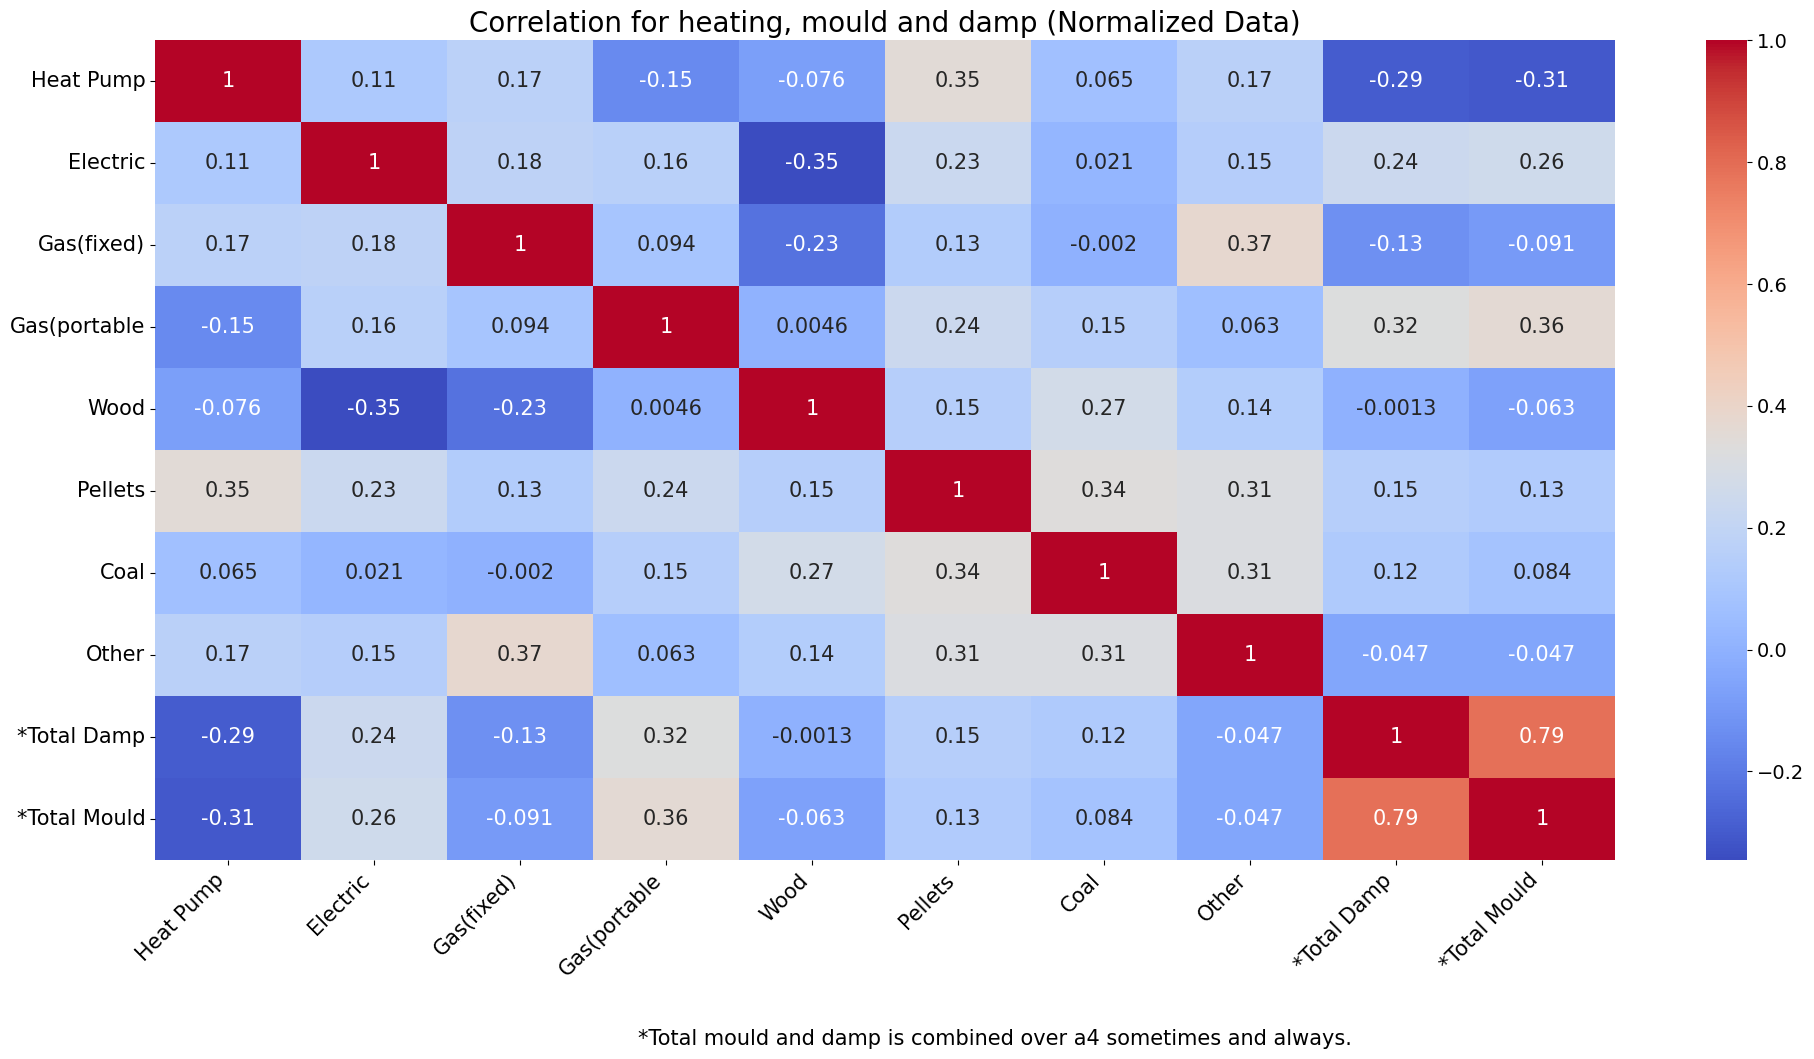

In [107]:
#USe seaborn to plot the correlation table
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(correlation_table, annot=True, cmap="coolwarm", annot_kws={"size": 15})

plt.title('Correlation for heating, mould and damp (Normalized Data)', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=15)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
footnote_text = "*Total mould and damp is combined over a4 sometimes and always."
plt.figtext(0.5, -0.05, footnote_text, wrap=True, horizontalalignment='center', fontsize=15,)
plt.tight_layout()

plt.show()